In [2]:
import os
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
# Langkah 1: Memuat dan Membersihkan Data
# Memuat file chat WhatsApp yang diekspor
with open('chatgroup.txt', 'r', encoding='utf-8') as file:
    raw_data = file.readlines()

# Ekstrak pesan (Anda bisa memodifikasi regex jika diperlukan)
pattern = r"^\d{1,2}/\d{1,2}/\d{2,4}, \d{2}:\d{2} - .+?: (.+)"
messages = [re.search(pattern, line).group(1) for line in raw_data if re.search(pattern, line)]

# Simpan pesan yang telah dibersihkan ke dalam file teks
data_group_file = 'data_group.txt'
with open(data_group_file, 'w', encoding='utf-8') as file:
    file.write("\n".join(messages))

In [11]:
# Langkah 2: Konversi ke CSV
csv_file = 'data_group.csv'
pd.DataFrame(messages, columns=['Message']).to_csv(csv_file, index=False)

In [12]:
# Langkah 3: Kompresi ke TAR
import tarfile
tar_file = 'data_group.tar'
with tarfile.open(tar_file, 'w') as tar:
    tar.add(csv_file)

In [13]:
# Langkah 4: Clustering Data
# Transformasi data dengan TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(messages)

Kata teratas untuk 3 cluster: [['deleted', 'message', 'aku'], ['media', 'omitted', '𝗼𝗳'], ['sukoharjo', 'nih', 'bagian']]


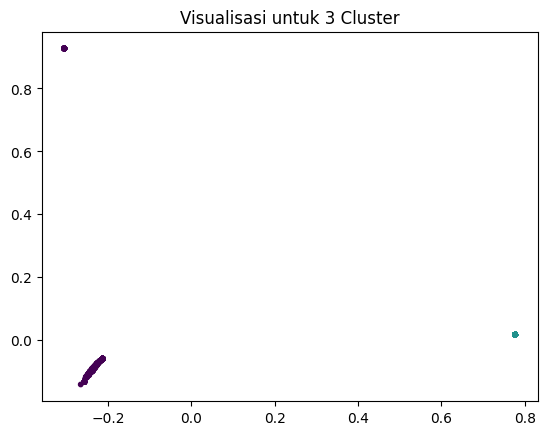

Kata teratas untuk 4 cluster: [['deleted', 'message', 'aku'], ['media', 'omitted', '𝗼𝗳'], ['sukoharjo', 'nih', 'bagian'], ['tiang', 'kulo', 'mas']]


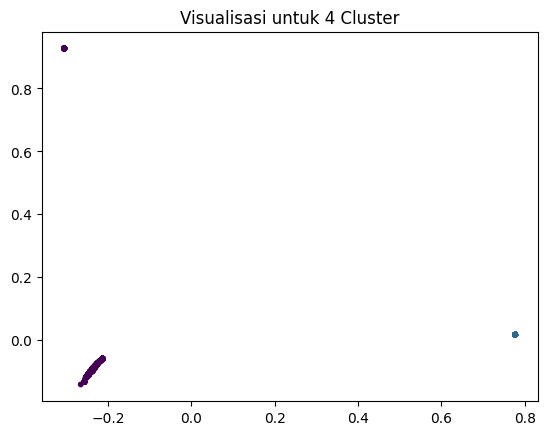

Kata teratas untuk 5 cluster: [['deleted', 'message', 'aku'], ['media', 'omitted', '𝗼𝗳'], ['sukoharjo', 'nih', 'bagian'], ['tiang', 'kulo', 'mas'], ['pabelan', 'online', 'warta']]


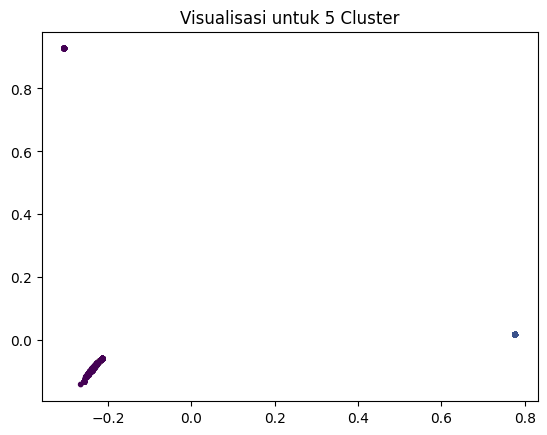

In [14]:
# Terapkan clustering KMeans
for n_clusters in [3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Ekstrak 3 kata teratas untuk setiap cluster
    cluster_words = []
    for cluster_id in range(n_clusters):
        cluster_center = kmeans.cluster_centers_[cluster_id]
        top_indices = cluster_center.argsort()[-3:][::-1]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_indices]
        cluster_words.append(top_words)

    print(f"Kata teratas untuk {n_clusters} cluster: {cluster_words}")

    # Visualisasi cluster dengan PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())

    plt.figure()
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f"Visualisasi untuk {n_clusters} Cluster")
    plt.show()

In [17]:
html_content = f"""
<!DOCTYPE html>
<html lang="id">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Laporan Tugas Sebelum UAS</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #f4f7fc;
            margin: 0;
            padding: 0;
            color: #333;
        }}
        header {{
            background-color: #4CAF50;
            color: white;
            text-align: center;
            padding: 10px 0;
        }}
        h1 {{
            margin: 0;
            font-size: 2em;
        }}
        main {{
            padding: 20px;
        }}
        h2 {{
            color: #4CAF50;
            margin-top: 20px;
        }}
        ul {{
            list-style-type: none;
            padding-left: 0;
        }}
        li {{
            background-color: #fff;
            border: 1px solid #ddd;
            padding: 12px;
            margin-bottom: 8px;
            border-radius: 5px;
            box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
            transition: transform 0.3s ease;
        }}
        li:hover {{
            transform: scale(1.05);
            background-color: #f1f1f1;
        }}
        strong {{
            color: #333;
        }}
        .visualization {{
            background-color: #fff;
            border-radius: 5px;
            padding: 20px;
            box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
        }}
        footer {{
            background-color: #4CAF50;
            color: white;
            text-align: center;
            padding: 10px;
            position: fixed;
            width: 100%;
            bottom: 0;
        }}
    </style>
    <script>
        function toggleClusterDetails(clusterId) {{
            var element = document.getElementById(clusterId);
            if (element.style.display === "none") {{
                element.style.display = "block";
            }} else {{
                element.style.display = "none";
            }}
        }}
    </script>
</head>
<body>
    <header>
        <h1>Laporan Clustering Grup WhatsApp</h1>
    </header>

    <main>
        <section>
            <h2>Kata Teratas dalam Cluster</h2>
            <p>Data telah berhasil diproses dan dilakukan clustering. Berikut adalah hasil analisis:</p>
            <ul>
                <li>
                    <strong>Kata teratas untuk 3 cluster:</strong>
                    <button onclick="toggleClusterDetails('cluster3')" style="background-color: #4CAF50; color: white; padding: 5px 10px; border: none; border-radius: 3px;">Tampilkan</button>
                    <div id="cluster3" style="display: none; margin-top: 10px;">
                        <ul>
                            <li>Cluster 1: ['deleted', 'message', 'aku']</li>
                            <li>Cluster 2: ['media', 'omitted', '𝗼𝗳']</li>
                            <li>Cluster 3: ['sukoharjo', 'nih', 'bagian']</li>
                        </ul>
                    </div>
                </li>
                <li>
                    <strong>Kata teratas untuk 4 cluster:</strong>
                    <button onclick="toggleClusterDetails('cluster4')" style="background-color: #4CAF50; color: white; padding: 5px 10px; border: none; border-radius: 3px;">Tampilkan</button>
                    <div id="cluster4" style="display: none; margin-top: 10px;">
                        <ul>
                            <li>Cluster 1: ['deleted', 'message', 'aku']</li>
                            <li>Cluster 2: ['media', 'omitted', '𝗼𝗳']</li>
                            <li>Cluster 3: ['sukoharjo', 'nih', 'bagian']</li>
                            <li>Cluster 4: ['tiang', 'kulo', 'mas']</li>
                        </ul>
                    </div>
                </li>
                <li>
                    <strong>Kata teratas untuk 5 cluster:</strong>
                    <button onclick="toggleClusterDetails('cluster5')" style="background-color: #4CAF50; color: white; padding: 5px 10px; border: none; border-radius: 3px;">Tampilkan</button>
                    <div id="cluster5" style="display: none; margin-top: 10px;">
                        <ul>
                            <li>Cluster 1: ['deleted', 'message', 'aku']</li>
                            <li>Cluster 2: ['media', 'omitted', '𝗼𝗳']</li>
                            <li>Cluster 3: ['sukoharjo', 'nih', 'bagian']</li>
                            <li>Cluster 4: ['tiang', 'kulo', 'mas']</li>
                            <li>Cluster 5: ['pabelan', 'online', 'warta']</li>
                        </ul>
                    </div>
                </li>
            </ul>
        </section>

        <section class="visualization">
            <h2>Visualisasi</h2>
            <p>Silakan lihat grafik clustering pada hasil output visualisasi di bawah ini.</p>
            <p><em>Catatan: Grafik clustering dapat ditambahkan melalui file eksternal atau hasil interaktif lainnya.</em></p>
        </section>
    </main>

    <footer>
        <p>&copy; 2025 Laporan Clustering Grup WhatsApp. Semua hak dilindungi.</p>
    </footer>
</body>
</html>
"""

report_file = 'laporan.html'
with open(report_file, 'w', encoding='utf-8') as file:
    file.write(html_content)

print(f"Laporan disimpan sebagai {report_file}")


Laporan disimpan sebagai laporan.html
